In [18]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import requests
import os

In [19]:
tabulador = pd.read_excel("../datos/tabulador_pe2019.xls", header = 9)

tabulador['TIPO'].unique()

clima = pd.read_csv("../Semana2/TEMPERATURAS_LLUVIAS.csv")

file = 'salarios_minimos.csv'
if not os.path.isfile(file):
    url = 'https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007'
    html = requests.get(url).content
    salarios_list = pd.read_html(html, header = 1)
    salarios = salarios_list[-1]
    salarios.to_csv('salarios_minimos.csv')
else:
    salarios = pd.read_csv(file)


In [20]:
tabulador = tabulador.sort_values(by = "SUELDO MENSUAL NETO", ascending = True)

sueldos = tabulador["SUELDO MENSUAL NETO"]
maximo = max(sueldos)
minimo = min(sueldos)
rango = (maximo-minimo)/6
x = np.arange(0, 6)
y = np.zeros(6)
for i in range(6):
    aux = sueldos[(minimo+i*rango)<sueldos]
    y[i] = len(aux[aux<(minimo+(i+1)*rango)])

In [21]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
78,1,A,OPERADOR/A TECNICO/A D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
75,1,A,OPERADOR/A ADMINISTRATIVO/A D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
77,1,A,OPERADOR/A COMERCIAL D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
76,1,A,OPERADOR/A DE SERVICIOS D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
74,1,NaN,OPERADOR/A ADMINISTRATIVO/A C,3374.277535,657.984119,1913.1,450,2364.753825,34.39,8794.505479,639.354852,556.755793,101.228326,7497.166508,10 Días por Año,45 Días por Año


In [22]:
tabulador.describe()

,NIVEL,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO
count,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,8.670886,14427.528244,2551.057005,1.913100e+03,4224.316456,13095.416510,13255.957722,49467.375935,11086.965356,2178.762464,372.294541,35829.353574
std,5.658489,12639.319936,1887.367119,2.745919e-12,5917.564742,12561.423626,16283.009818,48932.415025,14333.022606,1632.291459,257.338508,32902.782725
min,1.000000,3080.400000,600.678000,1.913100e+03,450.000000,1572.330000,0.000000,7616.508000,263.883632,508.266000,92.412000,6751.946368
25%,4.000000,4564.185105,890.016096,1.913100e+03,450.000000,3599.725827,936.540000,12353.567028,1173.958791,753.090542,136.925553,10289.592141
50%,8.000000,9458.572628,1844.421662,1.913100e+03,1012.000000,8611.753511,6545.820000,28148.204516,4414.420662,1560.664484,283.757179,22078.225282
75%,13.000000,22680.796123,4422.755244,1.913100e+03,4906.000000,16798.836156,19519.330000,70240.817524,15454.848684,3742.331360,680.423884,50363.213596
max,22.000000,59804.327930,5843.070000,1.913100e+03,25897.000000,64294.837780,75373.990000,233126.325711,69584.321342,5082.660000,760.410000,157698.934369


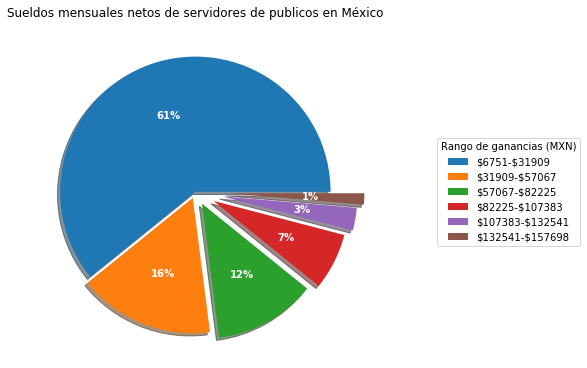

In [23]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

labels = ["\$" + str(int(minimo+i*rango))+ "-\$"+str(int(minimo+(i+1)*rango)) for i in range(6)]

wedges, texts, autotexts = ax.pie(y, explode = (0,0.05,0.1,0.15,0.2,0.25),
      autopct='%1.0f%%', shadow=True, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Rango de ganancias (MXN)",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title("Sueldos mensuales netos de servidores de publicos en México")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

In [24]:
clima = clima.sort_values(by = "Tmin")
clima.head()

,Estado,Localidad,Clave,Lon,Lat,2018,2019,2020,Tmax,Tmin,Tmed
39,CHIH,"Tejolocachi, Chih.",C08243,-107.70,28.76,27.20,68.00,3.0,16.935484,-4.548387,6.193548
40,CHIH,"Temósachic, Chih.",TMCCH,-107.85,28.95,41.64,6.43,2.5,18.051613,-4.032258,7.009677
365,SON,"Yécora, Son.",YCRSO,-108.93,28.37,92.22,0.02,7.0,21.241935,-3.431613,8.905161
28,CHIH,"Abraham González, Chih.",AGZCH,-107.48,28.48,63.56,15.52,1.5,17.000000,-3.333333,6.833333
36,CHIH,"Majalca, Chih.",C08099,-106.48,28.80,19.50,10.00,0.0,15.096774,-2.483871,6.306452


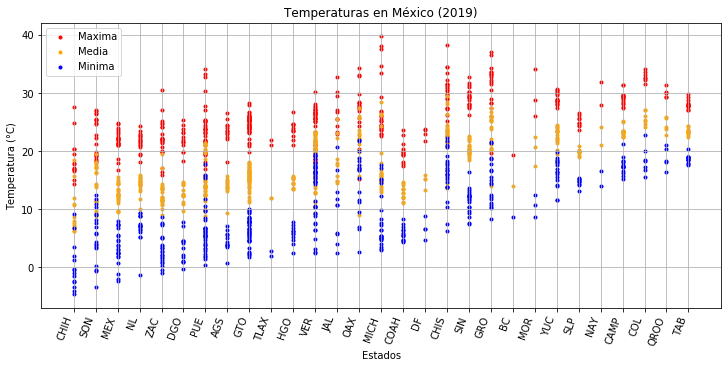

In [25]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

clima = clima.reset_index()
ax.scatter(clima.Estado, clima.Tmax, color = "Red", marker = '.', label = "Maxima")
ax.scatter(clima.Estado, clima.Tmed, color = "Orange", marker = '.', label = "Media")
ax.scatter(clima.Estado, clima.Tmin, color = "Blue", marker = '.', label = "Minima")
ax.set_ylabel("Temperatura (°C)")
ax.set_xlabel("Estados")
ax.grid()
ax.legend()
plt.title("Temperaturas en México (2019)")
plt.setp(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

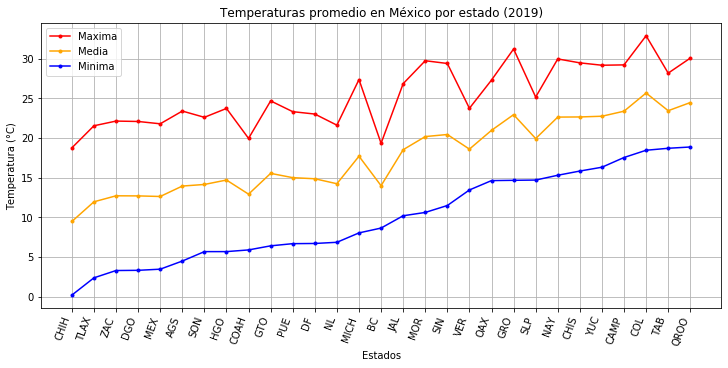

In [26]:
clima = clima.set_index(['Estado', 'Clave'])
clima = clima.sort_values(by = "Estado")
clima_promedio = clima.mean(level='Estado').reset_index().sort_values(by='Tmin')

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.plot(clima_promedio.Estado, clima_promedio.Tmax, color = "Red", marker = '.', label = "Maxima")
ax.plot(clima_promedio.Estado, clima_promedio.Tmed, color = "Orange", marker = '.', label = "Media")
ax.plot(clima_promedio.Estado, clima_promedio.Tmin, color = "Blue", marker = '.', label = "Minima")
ax.set_ylabel("Temperatura (°C)")
ax.set_xlabel("Estados")
ax.grid()
ax.legend()
plt.title("Temperaturas promedio en México por estado (2019)")
plt.setp(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

C:\Users\missa\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


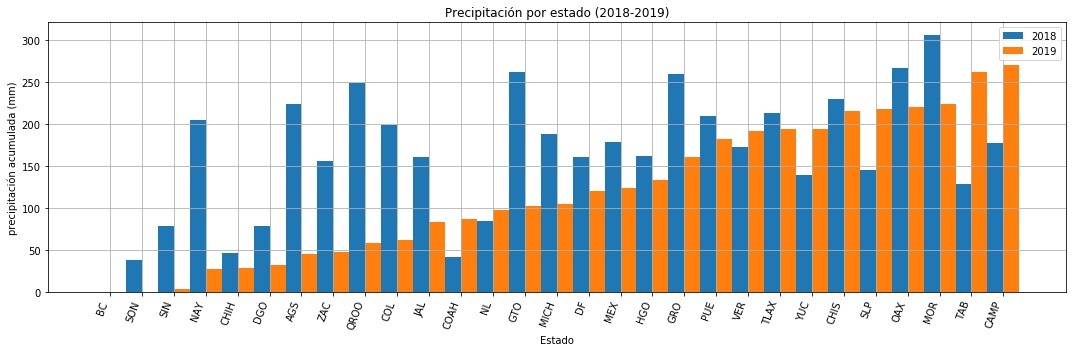

In [27]:
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)

clima_promedio = clima_promedio.sort_values(by='2019')

labels = clima_promedio.Estado
x = np.arange(len(labels))
width = 0.5

rects1 = ax.bar(x - width/2, clima_promedio["2018"], width, label='2018')
rects2 = ax.bar(x + width/2, clima_promedio["2019"], width, label='2019')

ax.set_ylabel('precipitación acumulada (mm)')
ax.set_xlabel('Estado')
ax.set_title('Precipitación por estado (2018-2019)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=70, ha="right")
fig.tight_layout()
plt.grid()
plt.show()

In [28]:
salarios = salarios.sort_values(by = "i", ascending = False)
salarios.head()

,i,Fecha de publicación el DOF,Vigente a partir de:,ZLFN1,Resto del país,A,B,C
44,44,29 de febrero 1988,1o. marzo 1988,NaN,NaN,8000.0,7405.0,6670.0
43,43,14 de diciembre 1988,1o. enero 1989,NaN,NaN,8640.0,7995.0,7205.0
42,42,26 de junio de 1989,1o. julio 1989,NaN,NaN,9160.0,8475.0,7640.0
41,41,4 de diciembre 1989,4 de diciembre 1989,NaN,NaN,10080.0,9325.0,8405.0
40,40,4 de diciembre 1989,1o. enero 1990,NaN,NaN,10080.0,9325.0,8405.0


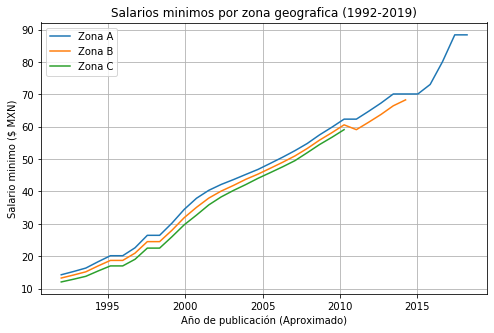

In [29]:
A = salarios.A[9:44]
B = salarios.B[9:44]
C = salarios.C[9:44]
x = np.linspace(1992, 2019, 35)

plt.figure(figsize=(8,5))
ax = plt.gca()
plt.plot(x, A, label= "Zona A")
plt.plot(x, B, label= "Zona B")
plt.plot(x, C, label= "Zona C")
plt.ylabel("Salario minimo ($ MXN)")
plt.xlabel("Año de publicación (Aproximado)")
plt.title("Salarios minimos por zona geografica (1992-2019)")
plt.grid()
plt.legend()

plt.show()